In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-65.42127339961355 153.27333768828623
74.60764582925665 127.59372410615754
2.805027367191741 161.37243454569995
19.01707268200923 -115.51309018981341
-57.32383805559456 -10.132704980294477
-59.52182839041971 114.80813455558376
29.407060663262357 -24.6173873080414
79.58673907502882 -151.71753865849388
-36.517711452538066 52.03959074654165
-6.511874693100083 125.41956564618425
-52.80136455215765 163.2554352962602
71.53003537519311 -154.45689722737654
-25.794304118418665 11.194012380370168
86.6152270930883 -108.62542019414887
30.12905242211653 -30.588456341794057
-45.082509364311285 -126.68913751758079
55.41780319955362 -72.51297247946809
-53.374874838011074 -25.394797916051203
-77.68156071865134 160.69903545009373
-40.82479429276994 111.58990648595227
-36.01178499507037 -79.63273629592065
-27.855905197506424 4.650463248703971
-52.17311165828257 92.24863788762622
0.14811047925958576 31.488650897954216
72.48474495814094 10.240848407356339
-1.6760947394806749 -56.27339112566325
-62.42770781

-25.301113560855768 -42.557408384088404
51.17903117927102 103.9311176354143
-59.4982789645894 -117.65008514203436
-80.56029783181646 114.58125349792107
-15.871620350307495 -129.3809542903698
-53.07080870846231 13.880183972124627
83.83849108408134 45.66425926201674
-10.0719728549808 109.94018846407789
-40.937262499302356 105.30591024297667
14.906458952834242 -109.07001457559228
-12.113361751786528 -112.93417811495311
11.39248613421448 11.090164386168112
-2.8532887159144025 39.16117258913317
-46.89924474695673 -135.10408317512787
-72.6578845853065 -46.03353949001382
-63.110293720072576 140.10776077124711
-89.72802278158582 82.88690893655212
-26.568349813974358 -118.18156091877515
27.026864095763955 95.17525532405568
-2.469975537320593 160.7287116245002
-59.20642309864772 93.84201146260625
-18.080274415083338 -63.55261827677849
-19.249443196592537 -119.03055982074362
-36.44625602780913 -108.39920675881446
37.53616376825596 -113.83431861159485
-4.484569543390407 170.09054212883376
46.40438

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [20]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
import requests

# Import the API key.
from config import weather_api_key

from citipy import citipy
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9374ed765de20496b0fceb6b72a98ea8


In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [22]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | kieta
Processing Record 4 of Set 1 | cabo san lucas
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | los llanos de aridane
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | atambua
Processing Record 11 of Set 1 | tuatapere
Processing Record 12 of Set 1 | luderitz
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | chapais
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | sembabule
Processing Record 22 of Set 1 | sorland
Processing Record 23 of Set 1 | oriximina
Processing Record 24 of Set

City not found. Skipping...
Processing Record 41 of Set 4 | la palma
Processing Record 42 of Set 4 | tuktoyaktuk
Processing Record 43 of Set 4 | salalah
Processing Record 44 of Set 4 | iqaluit
Processing Record 45 of Set 4 | atmakur
Processing Record 46 of Set 4 | markdorf
Processing Record 47 of Set 4 | ardakan
Processing Record 48 of Set 4 | phangnga
Processing Record 49 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 50 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 1 of Set 5 | hovd
Processing Record 2 of Set 5 | billings
Processing Record 3 of Set 5 | ladario
Processing Record 4 of Set 5 | lodja
Processing Record 5 of Set 5 | magdalena
Processing Record 6 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 5 | rawson
Processing Record 8 of Set 5 | eastbourne
Processing Record 9 of Set 5 | jacareacanga
Processing Record 10 of Set 5 | hilo
Processing Record 11 of Set 5 | buala
Processing Record 12 of Set 5 | s

Processing Record 25 of Set 8 | saint-joseph
Processing Record 26 of Set 8 | nizhnyaya omka
Processing Record 27 of Set 8 | mazyr
Processing Record 28 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 29 of Set 8 | broken hill
Processing Record 30 of Set 8 | hambantota
Processing Record 31 of Set 8 | college
Processing Record 32 of Set 8 | dillon
Processing Record 33 of Set 8 | ginda
Processing Record 34 of Set 8 | lagos
Processing Record 35 of Set 8 | kara
Processing Record 36 of Set 8 | skjervoy
Processing Record 37 of Set 8 | kushima
Processing Record 38 of Set 8 | gravdal
Processing Record 39 of Set 8 | sioux lookout
Processing Record 40 of Set 8 | tarves
Processing Record 41 of Set 8 | turukhansk
Processing Record 42 of Set 8 | urubicha
Processing Record 43 of Set 8 | arraial do cabo
Processing Record 44 of Set 8 | broome
Processing Record 45 of Set 8 | cabedelo
Processing Record 46 of Set 8 | manono
Processing Record 47 of Set 8 | ribas do rio pardo
Processing Re

Processing Record 13 of Set 12 | constantine
Processing Record 14 of Set 12 | nicolas bravo
Processing Record 15 of Set 12 | sassandra
Processing Record 16 of Set 12 | hervey bay
Processing Record 17 of Set 12 | ust-maya
Processing Record 18 of Set 12 | aksu
Processing Record 19 of Set 12 | north battleford
Processing Record 20 of Set 12 | qaqortoq
Processing Record 21 of Set 12 | davila
Processing Record 22 of Set 12 | tokmak
Processing Record 23 of Set 12 | santa fe
Processing Record 24 of Set 12 | suez
Processing Record 25 of Set 12 | maputo
Processing Record 26 of Set 12 | grindavik
Processing Record 27 of Set 12 | kaufungen
Processing Record 28 of Set 12 | gazanjyk
Processing Record 29 of Set 12 | san felipe
Processing Record 30 of Set 12 | gat
Processing Record 31 of Set 12 | tual
Processing Record 32 of Set 12 | saquarema
Processing Record 33 of Set 12 | baykalsk
Processing Record 34 of Set 12 | bambanglipuro
Processing Record 35 of Set 12 | potiskum
Processing Record 36 of Set 

In [23]:
print(len(cities))

612


In [24]:
#Convert the array of dictionaries into a Pandas data frame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,56.05,73,75,9.22,AU,2022-08-12 06:14:17
1,Tiksi,71.6872,128.8694,40.60,85,100,7.90,RU,2022-08-12 06:19:00
2,Kieta,-6.2167,155.6333,82.40,75,100,3.27,PG,2022-08-12 06:19:01
3,Cabo San Lucas,22.8909,-109.9124,85.60,80,43,3.27,MX,2022-08-12 06:19:01
4,Cape Town,-33.9258,18.4232,55.11,89,100,5.75,ZA,2022-08-12 06:19:02
5,Albany,42.6001,-73.9662,63.30,88,0,4.56,US,2022-08-12 06:19:02
6,Los Llanos De Aridane,28.6585,-17.9182,67.75,91,20,9.22,ES,2022-08-12 06:19:02
7,Barrow,71.2906,-156.7887,48.22,87,100,13.80,US,2022-08-12 06:19:03
8,Atambua,-9.1061,124.8925,83.64,56,18,2.35,ID,2022-08-12 06:19:03
9,Tuatapere,-46.1333,167.6833,44.85,81,82,5.21,NZ,2022-08-12 06:19:04


In [25]:
#Reorder the columns
new_order_column = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order_column]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-08-12 06:14:17,-42.8794,147.3294,56.05,73,75,9.22
1,Tiksi,RU,2022-08-12 06:19:00,71.6872,128.8694,40.60,85,100,7.90
2,Kieta,PG,2022-08-12 06:19:01,-6.2167,155.6333,82.40,75,100,3.27
3,Cabo San Lucas,MX,2022-08-12 06:19:01,22.8909,-109.9124,85.60,80,43,3.27
4,Cape Town,ZA,2022-08-12 06:19:02,-33.9258,18.4232,55.11,89,100,5.75
5,Albany,US,2022-08-12 06:19:02,42.6001,-73.9662,63.30,88,0,4.56
6,Los Llanos De Aridane,ES,2022-08-12 06:19:02,28.6585,-17.9182,67.75,91,20,9.22
7,Barrow,US,2022-08-12 06:19:03,71.2906,-156.7887,48.22,87,100,13.80
8,Atambua,ID,2022-08-12 06:19:03,-9.1061,124.8925,83.64,56,18,2.35
9,Tuatapere,NZ,2022-08-12 06:19:04,-46.1333,167.6833,44.85,81,82,5.21


In [29]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/cities.csv'

In [30]:
#Extract relevant fields from the data frame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

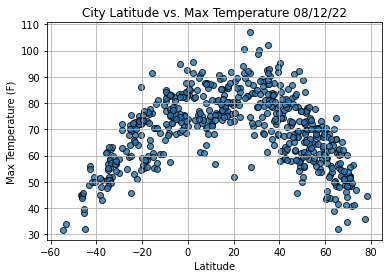

In [31]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, 
            max_temps, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('Fig1.png')

#Show plot
plt.show()

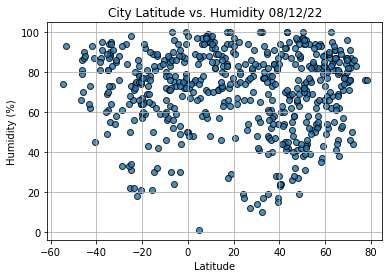

In [32]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('Fig2.png')

#Show plot
plt.show()

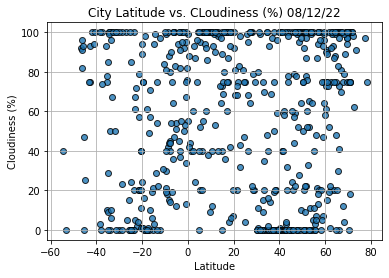

In [33]:
#Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. CLoudiness (%) '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('Fig3.png')

#Show plot
plt.show()

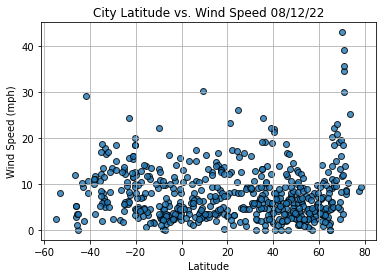

In [35]:
#Build the scatter plot for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('Fig4.png')

#Show plot
plt.show()